## Árbol de Regresión - Predicción de SalePrice
En este análisis aplicaremos un árbol de regresión utilizando únicamente las variables numéricas seleccionadas.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector as selector

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')


## Preprocesamiento - Eliminación de NaN (simplificado)
Se imputan valores faltantes con la mediana para cada columna numérica.

In [27]:
df = pd.read_csv("train.csv")

variables_numericas = [
'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

In [28]:

df = df.fillna(df.median())

### Separar variables predictoras y variable objetivo
La variable objetivo es `SalePrice`.

In [29]:
X = df.drop(columns=['SalePrice'])
y = np.log(df['SalePrice'])  # Usamos log(SalePrice)

### Dividir en conjunto de entrenamiento y prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Configurar Pipeline y Árbol de Regresión
##### Escalamos variables numéricas para estandarizar.


In [ ]:

numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('num', numerical_preprocessor, X.columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=123))
])

### Búsqueda de mejor profundidad (max_depth) con GridSearchCV


In [ ]:
# Se evaluarán profundidades entre 2 y 10.
param_grid = {'regressor__max_depth': np.arange(2, 11)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

### Entrenamiento del modelo

In [ ]:
grid_search.fit(X_train, y_train)
print(f"Mejor profundidad seleccionada: {grid_search.best_params_['regressor__max_depth']}")


Mejor profundidad seleccionada: 7


### Predicción y evaluación sobre el conjunto de prueba

In [ ]:
y_pred = grid_search.predict(X_test)

### Métricas de evaluación

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.1263
MSE: 0.0347
R²: 0.7953


### Visualización - Gráfica Predicciones vs Valores Reales

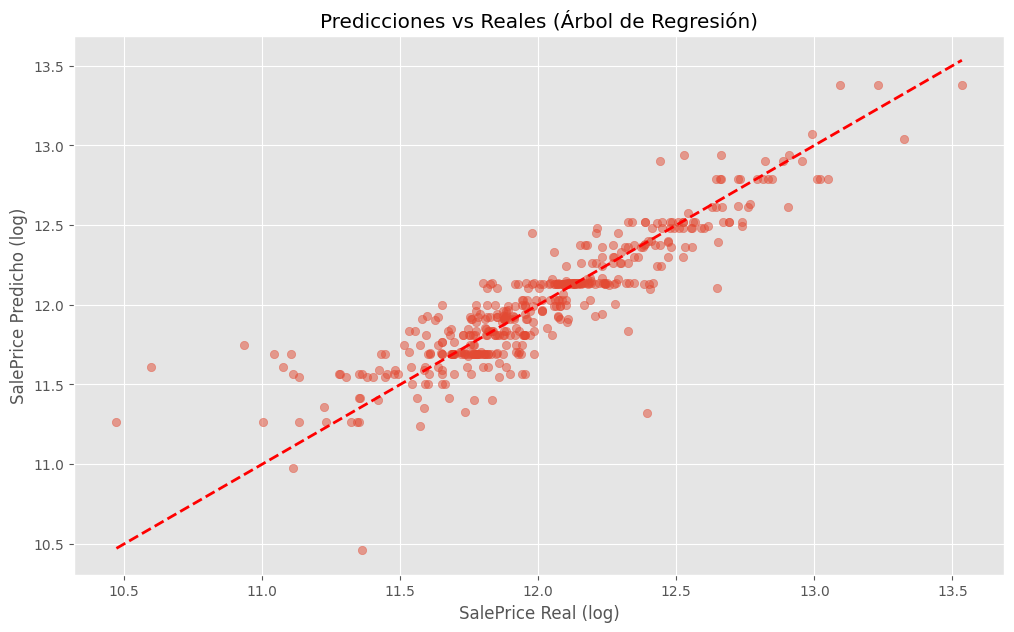

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("SalePrice Real (log)")
plt.ylabel("SalePrice Predicho (log)")
plt.title("Predicciones vs Reales (Árbol de Regresión)")
plt.show()

### Visualización - Residuales vs Valores Predichos

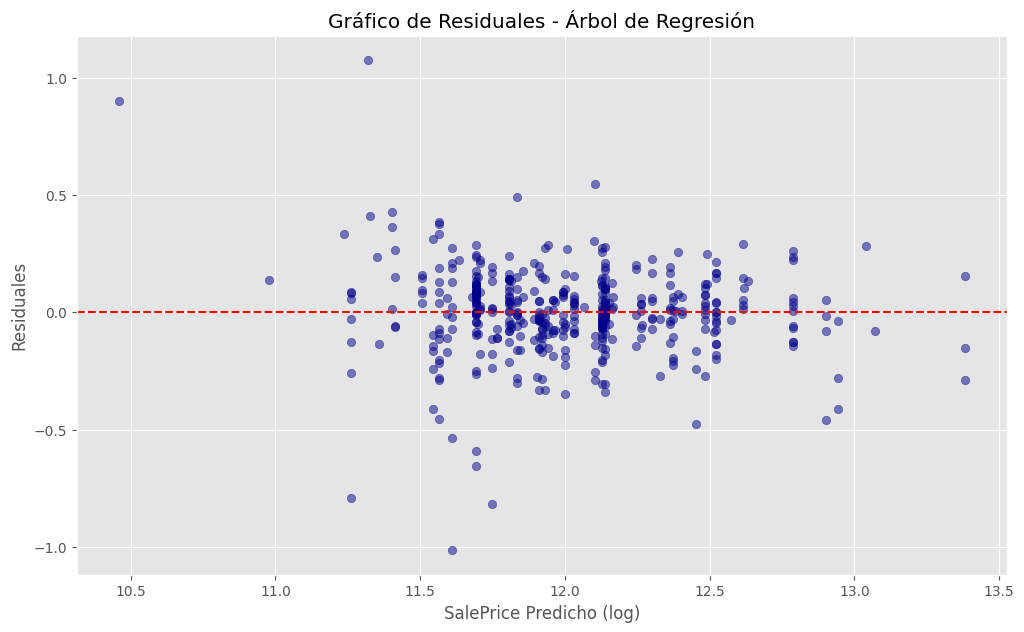

In [ ]:
residuales = y_test - y_pred
plt.scatter(y_pred, residuales, alpha=0.5, color='darkblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("SalePrice Predicho (log)")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales - Árbol de Regresión")
plt.show()

### Visualización - Histograma de Residuales

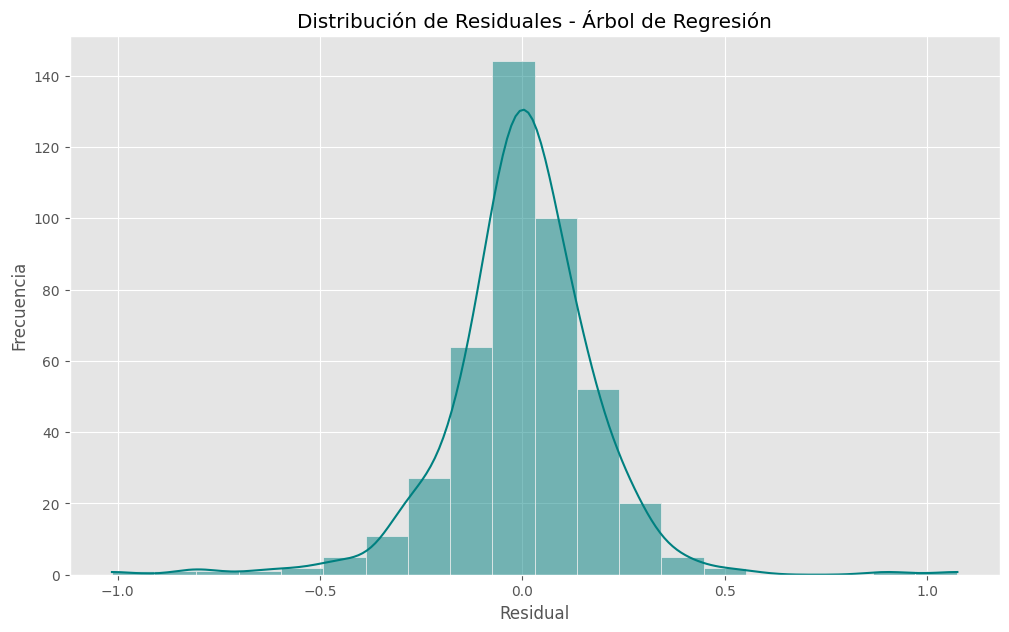

In [ ]:
sns.histplot(residuales, kde=True, color="teal", bins=20)
plt.title("Distribución de Residuales - Árbol de Regresión")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

## Análisis de Resultados - Árbol de Regresión (Profundidad Inicial = 7)


### Métricas de Evaluación

El modelo de Árbol de Regresión fue evaluado con el conjunto de prueba, obteniendo las siguientes métricas:

- **MAE (Error Absoluto Medio):** 0.1263  
    El MAE representa el promedio de la magnitud de los errores absolutos entre las predicciones y los valores reales (en escala log). Un valor relativamente bajo indica que el modelo tiene una precisión aceptable.

- **MSE (Error Cuadrático Medio):** 0.as  
    El MSE refleja la magnitud promedio al cuadrado de los errores. Este valor nos dice que, en promedio, el error al predecir el logaritmo del precio de las casas es pequeño.

- **R² (Coeficiente de Determinación):** 0.7953  
    El R² muestra que el modelo explica el **79.53%** de la variabilidad observada en el precio de las casas. Esto es un buen nivel de ajuste, lo cual sugiere que el árbol de regresión es capaz de capturar patrones relevantes en los datos.

---

### Análisis Gráfico

### 1️⃣ Gráfico de Predicciones vs Reales

Este gráfico permite observar cómo se comparan las predicciones contra los valores reales de `log(SalePrice)`. En general, el modelo logra seguir la tendencia diagonal esperada (predicción = valor real). Sin embargo, hay cierta dispersión alrededor de esta línea, lo cual es normal en modelos de árbol, ya que estos tienden a crear regiones o "escalones" en vez de capturar relaciones suaves entre variables.

En términos generales, el desempeño visual es **aceptable**, con un patrón coherente, aunque no perfectamente alineado.

---

### 2️⃣ Gráfico de Residuales

En el gráfico de residuales, donde se comparan los errores contra las predicciones, se observa que los residuales se distribuyen alrededor de cero, lo cual es positivo. Sin embargo, hay una dispersión algo amplia y algunos puntos que se alejan significativamente, lo que refleja que el árbol puede estar sobreajustando ciertas regiones o no capturando correctamente algunos patrones complejos.

La dispersión de los residuales es mayor en ciertas zonas, lo cual podría indicar que el modelo tiene más dificultad para predecir correctamente casas con precios extremos (muy bajas o muy altas).

---

### 3️⃣ Histograma de Residuales

El histograma de residuales muestra una forma aproximadamente normal, lo cual es una señal positiva. Sin embargo, hay una ligera asimetría hacia la izquierda, indicando que el modelo tiende a **subestimar** algunos precios, en especial propiedades con precios altos o características particulares.

---

### Análisis del Resultado - ¿Qué tal lo hizo?

En general, el **Árbol de Regresión** mostró un desempeño **razonablemente bueno** para ser un primer intento con profundidad inicial. Logró explicar cerca del **80%** de la variabilidad de `log(SalePrice)`, lo cual es **un nivel aceptable** para un problema de predicción de precios inmobiliarios, que suele tener alta complejidad. Además, tanto el error absoluto medio (MAE) como el error cuadrático medio (MSE) se encuentran en rangos aceptables, lo cual indica que las predicciones son útiles y no se alejan excesivamente de los valores reales.

Sin embargo, el patrón observado en los gráficos sugiere que el modelo aún puede mejorar, ya que existen señales de posibles **subestimaciones en propiedades más costosas**, así como cierta **heterogeneidad** en los errores a lo largo del rango de precios. Esto es esperable en árboles de regresión, que pueden ser algo sensibles a la configuración inicial de parámetros, como la profundidad máxima, lo cual se explorará posteriormente.

En conclusión, el modelo es **funcional y ofrece una predicción aceptable**, pero con oportunidad de mejora al ajustar la profundidad y evaluar posibles transformaciones adicionales en las variables.


# Ahora probaremos múltiples profundidades


C:\Users\n8nug\AppData\Local\Temp\ipykernel_18780\3765086566.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


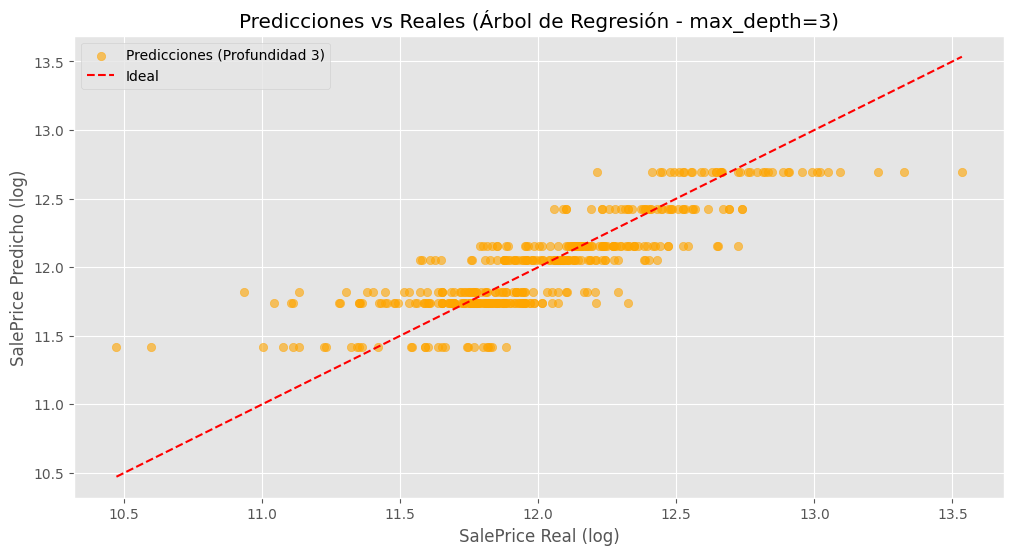

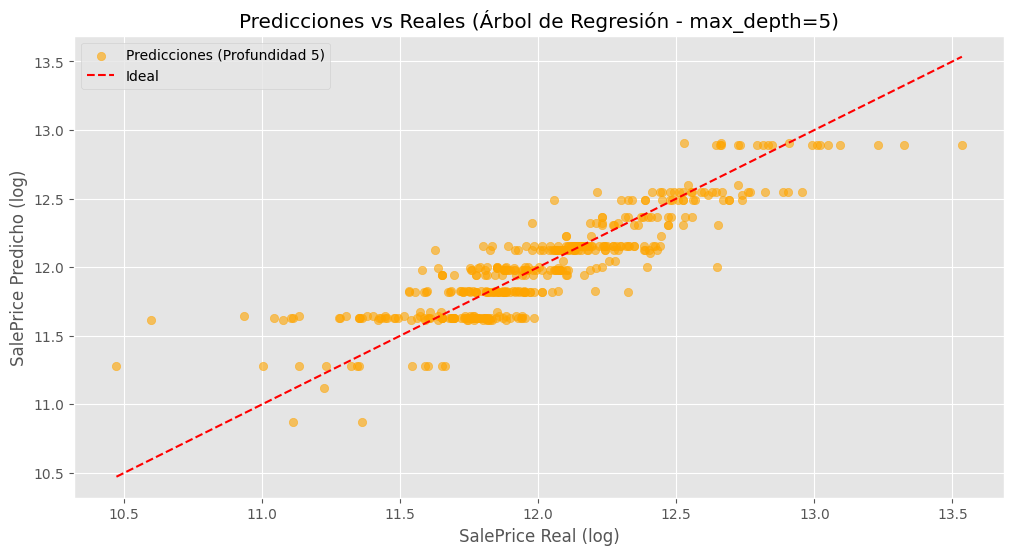

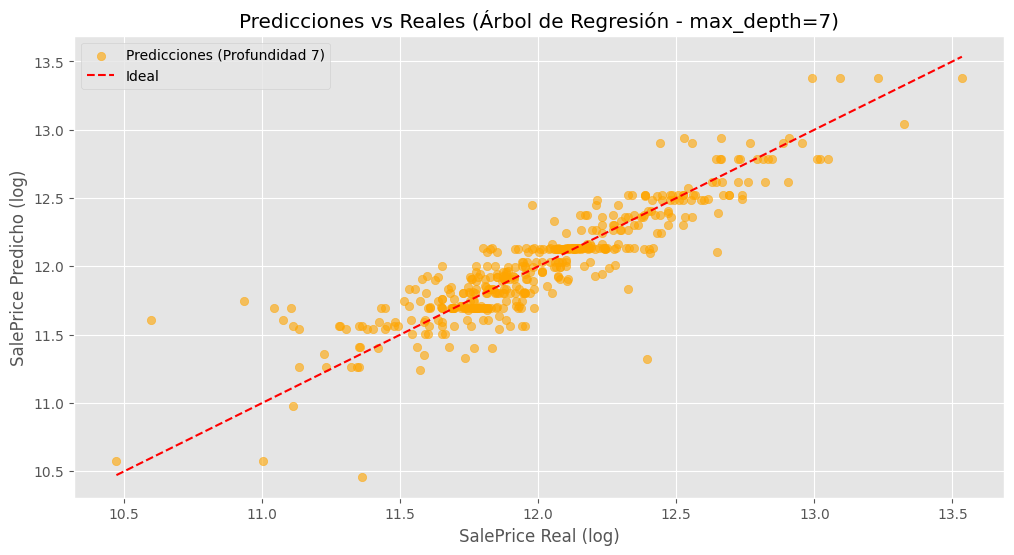

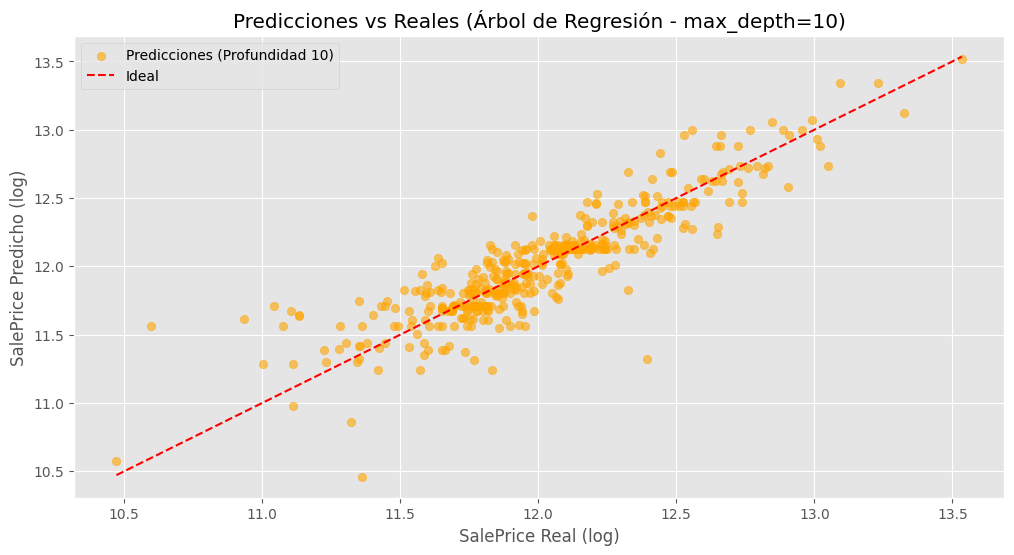

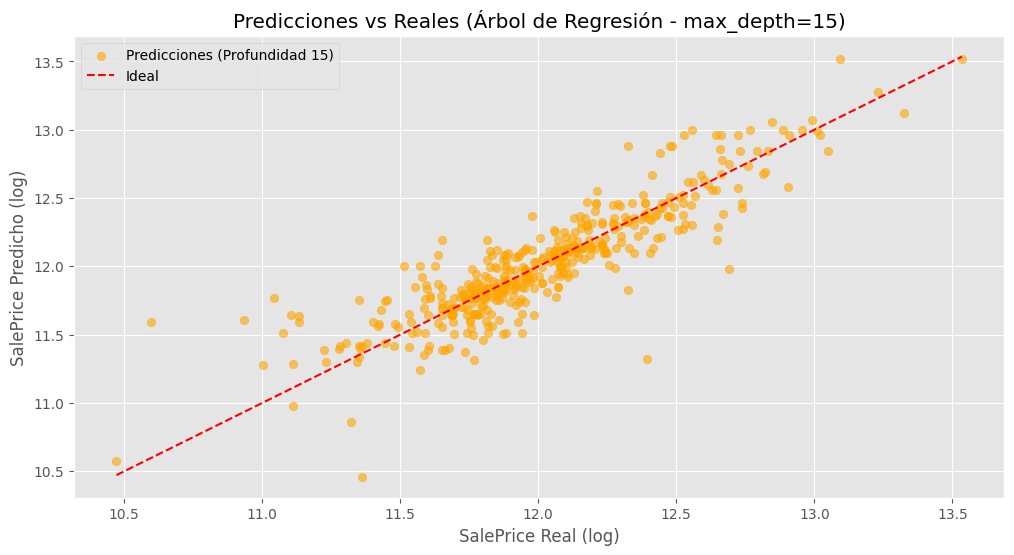


Resultados comparativos:
  Max Depth       MAE       MSE        R²
0         3  0.167099  0.050938  0.699739
1         5  0.144000  0.037544  0.778690
2         7  0.127394  0.034435  0.797017
3        10  0.129972  0.035846  0.788702
4        15  0.138046  0.040051  0.763917


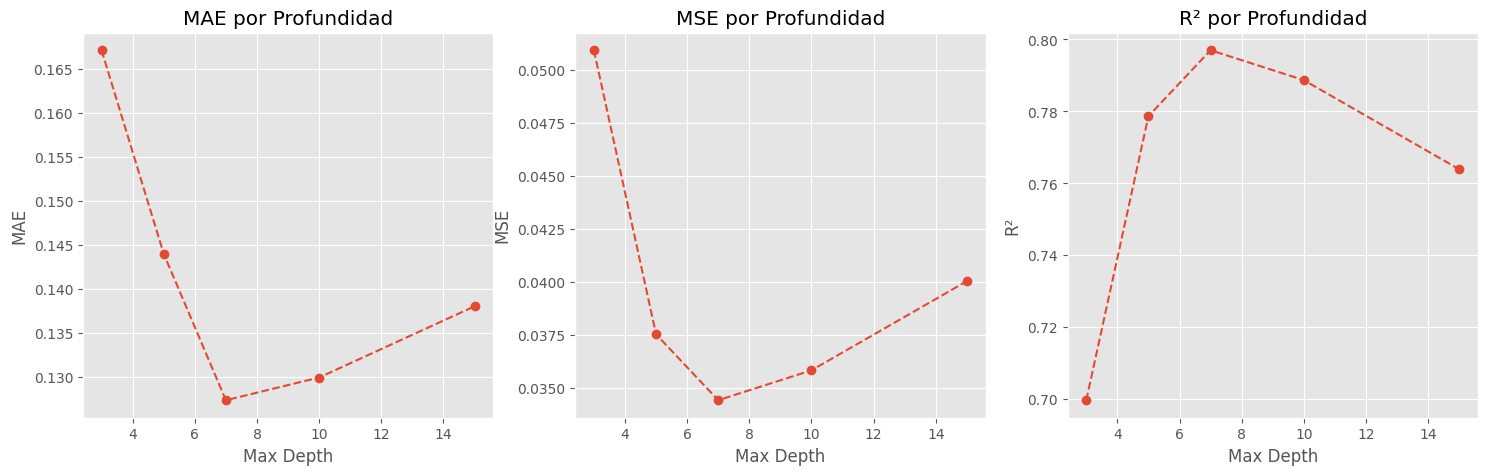

In [43]:
# Lista de profundidades
depths = [3, 5, 7, 10, 15]

# DataFrame para guardar los resultados
results = pd.DataFrame(columns=["Max Depth", "MAE", "MSE", "R²"])

# Loop para entrenar un árbol con cada profundidad
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicción sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results = pd.concat([results, pd.DataFrame({
        "Max Depth": [depth],
        "MAE": [mae],
        "MSE": [mse],
        "R²": [r2]
    })], ignore_index=True)
    
    # Graficar predicciones vs reales para cada modelo
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label=f'Predicciones (Profundidad {depth})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
    plt.xlabel("SalePrice Real (log)")
    plt.ylabel("SalePrice Predicho (log)")
    plt.title(f"Predicciones vs Reales (Árbol de Regresión - max_depth={depth})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Mostrar tabla comparativa
print("\nResultados comparativos:")
print(results)

# Gráfico comparativo de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, metric in enumerate(["MAE", "MSE", "R²"]):
    axes[idx].plot(results["Max Depth"], results[metric], marker='o', linestyle='--')
    axes[idx].set_title(f"{metric} por Profundidad")
    axes[idx].set_xlabel("Max Depth")
    axes[idx].set_ylabel(metric)
    axes[idx].grid(True)

plt.show()

# Análisis Comparativo de Modelos de Árbol de Regresión

## Descripción General

Se entrenaron y evaluaron **5 modelos de árbol de regresión** con diferentes profundidades (`max_depth`). Cada modelo fue ajustado con el conjunto de entrenamiento y evaluado con el conjunto de prueba, utilizando como métrica principal:

- **MAE**: Error absoluto medio.
- **MSE**: Error cuadrático medio.
- **R²**: Coeficiente de determinación, que mide el porcentaje de la varianza explicada.

---

## Resultados Obtenidos

| Max Depth | MAE | MSE | R² |
|---|---|---|---|
| 3 | 0.1671 | 0.0509 | 0.6997 |
| 5 | 0.1440 | 0.0375 | 0.7787 |
| 7 | 0.1274 | 0.0344 | 0.7970 |
| 10 | 0.1300 | 0.0358 | 0.7887 |
| 15 | 0.1380 | 0.0400 | 0.7639 |

---

## Análisis e Interpretación

### 1. Comportamiento de las métricas
- **MAE y MSE**: Observamos que el **mejor desempeño** (menor error) se logra con una profundidad de `max_depth = 7`. 
- **R²**: El modelo con `max_depth = 7` es también el que más varianza logra explicar (casi el 80%).
- A profundidades menores (como `max_depth = 3`), el árbol es demasiado simple y no captura correctamente la relación entre las variables, resultando en errores más altos y menor capacidad predictiva.
- Al incrementar excesivamente la profundidad (ej. `max_depth = 15`), el modelo comienza a **sobreajustar** (overfitting). Esto significa que ajusta demasiado a las particularidades del conjunto de entrenamiento, perdiendo capacidad de generalización al conjunto de prueba.

---

### 2. Gráficas comparativas
#### Predicciones vs Reales
- En `max_depth = 3`, las predicciones tienden a agruparse en pocos valores fijos (propio de árboles poco profundos), lo cual limita la precisión.
- Conforme crece la profundidad, las predicciones se ajustan mejor a la diagonal ideal.
- Sin embargo, a partir de `max_depth = 10`, se empieza a observar un leve aumento de dispersión, indicando sobreajuste.

#### Métricas por profundidad
- Los gráficos de MAE, MSE y R² refuerzan esta conclusión: la mejor combinación entre bajo error y alta varianza explicada ocurre en `max_depth = 7`.

---

### Conclusión
- El **mejor modelo** es el **Árbol de Regresión con `max_depth = 7`**, ya que logra el equilibrio óptimo entre simplicidad y capacidad predictiva.
- Este modelo logra capturar relaciones no lineales y patrones ocultos sin caer en sobreajuste excesivo.